In [0]:
#https://github.com/grand-coder/HISkioDL/blob/master/mlp_mnist.ipynb
from keras.datasets.mnist import load_data
# load_data() 的output是4個tuple要用4個變數去接
# ((訓練圖片, 訓練圖片答案), (測試圖片, 測試圖片答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [0]:
print("訓練資料維度:", x_train.shape)
print("測試資料維度:", x_test.shape)
print("訓練答案維度:", y_train.shape)
print("測試答案維度:", y_test.shape)

訓練資料維度: (60000, 28, 28)
測試資料維度: (10000, 28, 28)
訓練答案維度: (60000,)
測試答案維度: (10000,)


In [0]:
load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

正確答案 8


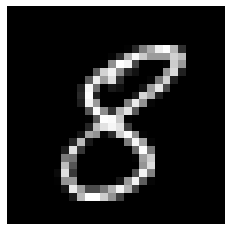

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import random #等一下在訓練資料隨便抽一張來看看
c = random.randint(0, 59999)
print("正確答案", y_train[c])
plt.axis("off") #把x y軸關掉
plt.imshow(x_train[c], cmap="gray") #cmap="gray"設定灰階

In [0]:
# 可看到圖片是由一堆數字表示的
x_train[c]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   3,  41, 126, 172, 239, 255, 183,  49,   0,   0,   0,
          0,   0],
       [  

In [0]:
# 跟上一不一樣意思 但pandas比較好看
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,41,126,172,239,255,183,49,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,5,44,180,247,203,155,155,155,209,188,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,7,144,254,244,71,0,0,0,5,204,153,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,93,212,244,141,39,17,0,0,0,150,217,32,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,94,238,159,224,46,0,0,0,6,121,209,33,0,0,0,0,0,0


### 欣賞完了就 開始做資料處理Step 1

#### Step 1.1處理圖片(x)

In [0]:
# 往上滑看到x_train維度原本是(60000, 28, 28)有60000筆28x28的資料
# 但是input要是一維的所以把2維的28x28攤平成1維的784
# 數字原本是0~255全部都除255就把數字變成0~1之間
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
x_train_shape[0] #可以開一個x_train[0]比對一下

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Step 1.2處理答案(y)

In [0]:
from keras.utils.np_utils import to_categorical #要做one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前會出現0~9:", y_train[99]) 
print("處理後猜的數字位置是1其他都是0:", y_train_cat[99]) 

處理前會出現0~9: 5
處理後猜的數字位置是1其他都是0: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 建立模型Step 2

#### Step 2.1 搭建MLP模型

In [0]:
from keras.models import Sequential # 建立模型框架
from keras.layers import Dense # 全連接層
model = Sequential() # 建立變數名字叫做model空MLP框架 等一下用  .add一層一層加
# 設定units這層有幾個神經元，activation設定激活函數不是最後一層的話都用relu系列
# 輸入層要設定input_dim 記得先攤平成一維
model.add(Dense(units = 128, activation="relu", input_dim=784)) 
model.add(Dense(units = 10, activation="softmax")) 
#這邊output的units只能是10 因為答案是0~9共10種輸出
model.summary()
# 報表的Param全名是parameter 就是有多少權重(參數)要訓練
# 第一層參數100480 = (前一層神經元數 + Bias) x 下一層神經元數 = (784+1) x 128 自己畫圖連連看
# 第二層 1290 = (128+1) x 10

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Step 2.2確定模型怎麼訓練

In [0]:
# 上面框架搭建好了 接下來'確定模型該怎麼訓練'
# loss是設定損失函數 這邊是要做'分類' 所以categorical_crossentropy交叉熵 用機率看雜亂度 
# 希望預測亂度最小 反正預測是機率就用categorical_crossentropy ，特例:二元分類時用binary_crossentropy
# optimizer是優化器(像是用動態步伐試圖走到最低谷) adam通常表現最好
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#### Step 2.3正式開始訓練模型

In [0]:
model.fit(x = x_train_shape, # x是訓練資料
          y = y_train_cat,   # y是訓練資料答案
          batch_size=200,    # batch_size是看幾筆資料調整一個參數(做梯度下降一次)通長都設100~200
          epochs=15,         # epochs是整份資料要看幾輪(epochs太多容易Overfitting)
          validation_split=0.1, #validation_split通常是設定0.1 表示10%的題目考試 剩下的題目練習
          verbose=2) # verbose可以設0(最安靜什麼都沒有) 1(有進度條) 2(沒進度條)

# 注意報表的val_loss開始沒什麼再下降就是開始Overfitting了 
# 如果想再訓練就再執行一次會接著訓練

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4327 - accuracy: 0.8821 - val_loss: 0.1971 - val_accuracy: 0.9462
Epoch 2/15
 - 1s - loss: 0.2041 - accuracy: 0.9424 - val_loss: 0.1450 - val_accuracy: 0.9612
Epoch 3/15
 - 1s - loss: 0.1521 - accuracy: 0.9564 - val_loss: 0.1196 - val_accuracy: 0.9685
Epoch 4/15
 - 1s - loss: 0.1225 - accuracy: 0.9651 - val_loss: 0.1076 - val_accuracy: 0.9705
Epoch 5/15
 - 1s - loss: 0.1006 - accuracy: 0.9715 - val_loss: 0.0967 - val_accuracy: 0.9737
Epoch 6/15
 - 1s - loss: 0.0848 - accuracy: 0.9759 - val_loss: 0.0903 - val_accuracy: 0.9728
Epoch 7/15
 - 1s - loss: 0.0721 - accuracy: 0.9799 - val_loss: 0.0855 - val_accuracy: 0.9752
Epoch 8/15
 - 1s - loss: 0.0619 - accuracy: 0.9825 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 9/15
 - 1s - loss: 0.0538 - accuracy: 0.9848 - val_loss: 0.0829 - val_accuracy: 0.9755
Epoch 10/15
 - 1s - loss: 0.0469 - accuracy: 0.9870 - val_loss: 0.0815 - val_accuracy: 0.9748
Epoch 11/15
 - 1s - 

### 驗證模型Step3

#### Step 3.1拿測試資料丟進去 看重要的指標

In [0]:
model.evaluate(x = x_test_shape, y = y_test_cat)
# 報表第一個數字是測試資料Loss  第二個數字是測試資料的metrics
# 滑上去看model.compile()那塊 Loss是categorical_crossentropy，metrics是accuracy

10000/10000 [==============================] - 1s 71us/step


[0.07507460752385668, 0.9776999950408936]

#### Step 3.2 做預測 會跑出機率

In [0]:
# model.predict(x_test_shape)每筆資料會跑出10個機率 
print("預測機率:", model.predict(x_test_shape))
# model.predict_classes(x_test_shape) 機率最高的就會當作是預測答案
print("預測答案:", model.predict_classes(x_test_shape))

預測機率: [[2.25300170e-08 8.09076972e-10 1.35583139e-06 ... 9.98624086e-01
  2.18582227e-06 2.59028502e-06]
 [3.90208434e-08 1.26152836e-05 9.99986649e-01 ... 2.51539542e-15
  4.27036788e-08 4.93651013e-15]
 [3.20769414e-06 9.98406231e-01 7.28213345e-04 ... 3.30922718e-04
  3.04582762e-04 5.55508814e-06]
 ...
 [9.32121914e-12 1.21315132e-12 2.02760534e-11 ... 3.97051792e-07
  6.69218082e-07 1.27405965e-05]
 [1.13372955e-09 1.27477873e-09 4.00116773e-10 ... 9.30689747e-10
  3.96875330e-05 6.86349311e-11]
 [6.25674046e-09 3.89864519e-13 2.97645153e-09 ... 1.07514231e-14
  2.47016058e-12 4.11006541e-11]]
預測答案: [7 2 1 ... 4 5 6]


#### Step 3.3 confusion_matrix

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = model.predict_classes(x_test_shape) # 把預測的答案存成pre
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = pre))
# 表格 左邊(直的)是正確答案y_true  上邊(橫的)是預測的答案y_pred

,0,1,2,3,4,5,6,7,8,9
0,966,0,1,0,0,2,6,1,3,1
1,0,1123,4,0,0,1,2,1,4,0
2,4,1,1008,3,1,1,2,5,7,0
3,0,0,2,993,0,2,0,6,3,4
4,1,0,5,1,955,0,4,2,1,13
5,1,0,0,7,1,873,6,1,2,1
6,5,2,2,1,1,4,941,0,2,0
7,0,3,10,3,0,0,0,1005,0,7
8,5,0,4,9,5,6,1,5,934,5
9,2,4,1,6,9,3,0,4,1,979


#### Step3.4 對答案

In [0]:
# 看哪幾筆預測不等於真正答案 (就是哪幾筆跑出True)
pre != y_test

array([False, False, False, ..., False, False, False])

In [0]:
import numpy as np #np.nonzero會跑出所有不是0的位置 就是True的位置
np.nonzero(pre != y_test) #看一下output 小括號()包住是一個Tuple 
# 因為input是給他1維的東西 所以整個Tuple有用的只有第一個 (0號位置)

(array([   8,   61,  115,  149,  247,  321,  340,  381,  445,  495,  582,
         619,  659,  684,  691,  707,  810,  877,  947,  951,  956,  965,
        1014, 1039, 1044, 1112, 1128, 1182, 1192, 1194, 1226, 1232, 1242,
        1247, 1299, 1319, 1393, 1444, 1464, 1500, 1522, 1530, 1549, 1581,
        1609, 1621, 1678, 1681, 1709, 1717, 1754, 1790, 1828, 1850, 1901,
        1941, 1955, 1970, 1984, 1987, 2004, 2016, 2035, 2044, 2053, 2070,
        2098, 2109, 2118, 2135, 2182, 2272, 2293, 2329, 2369, 2387, 2406,
        2488, 2514, 2582, 2635, 2648, 2654, 2720, 2758, 2877, 2896, 2915,
        2921, 2939, 2995, 3073, 3117, 3289, 3490, 3503, 3520, 3534, 3542,
        3552, 3558, 3567, 3597, 3674, 3681, 3718, 3727, 3749, 3751, 3780,
        3796, 3811, 3818, 3838, 3853, 3902, 3906, 3926, 3941, 3943, 4065,
        4075, 4078, 4123, 4176, 4199, 4201, 4224, 4248, 4269, 4289, 4294,
        4369, 4419, 4425, 4497, 4500, 4534, 4536, 4639, 4731, 4740, 4807,
        4823, 4860, 4880, 4956, 4966, 

#### 檢討:把錯的印出來

到底有幾個預測錯誤: 223


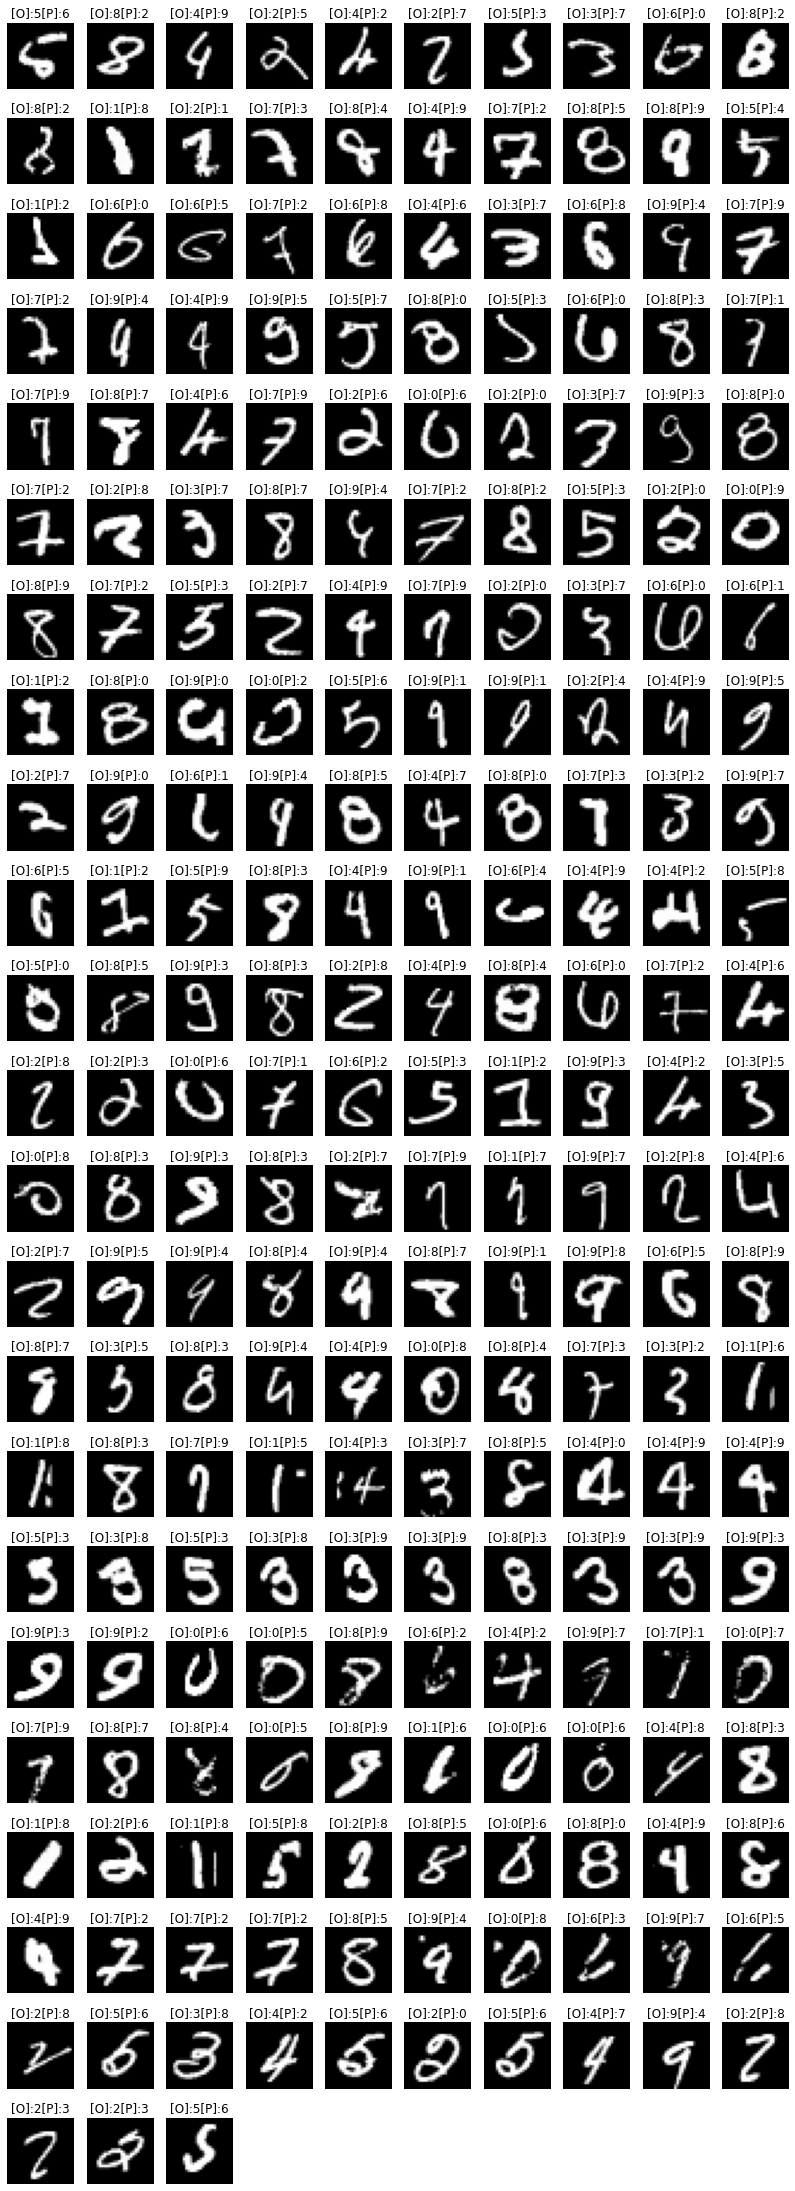

In [0]:
import numpy as np
false_index = np.nonzero(pre != y_test)[0] # 你寫錯的題號
print("到底有幾個預測錯誤:", len(false_index))
false_img = x_test[false_index] # 用預測錯誤的索引 抓出你寫錯的題目
ori_label = y_test[false_index] # 用預測錯誤的索引 抓出你寫錯題目的答案
pre_label = pre[false_index] #回憶:pre是預測的答案 用預測錯誤的索引 抓出錯的那幾題你寫了什麼答案

width = 10
height = int(len(false_index) / 10) + 1
# plt.figure是調整每張圖大小 很重要! 不然原圖太大或太小印出來會很怪
plt.figure(figsize=(14, 40))  #第一個數字是每行的距離 第二個數字是每列的距離

for (index, img) in enumerate(false_img): #enumerate會把裡面的東西都變成tuple 要用2個變數接(看下面簡單的範例)
    plt.subplot(height, width, index + 1) #設定總高度 總寬度 第幾張圖片(+1是因為索引從0開始 第1張圖的index是0)
    msg = "[O]:" + str(ori_label[index]) + "[P]:" + str(pre_label[index]) #設定每張圖的標題
    #ori_label[a]是第a題的正確答案 ，pre_label[a]是第a題你寫了什麼答案
    plt.title(msg)
    plt.axis("off") #關掉x y軸
    plt.imshow(img, cmap="gray") #設定灰階色調

In [0]:
#enumerate( )範例
seq = ['one', 'two', 'three'] 
for i, element in enumerate(seq):      
    print(i, element)

0 one
1 two
2 three


### 儲存模型Step4

#### Step4.1 存成 XX.h5檔

In [0]:
# 如果不是用Colab就直接model.save就好 要給檔名不給完整路徑的話就會跟這格python擋在同一個資料夾
from google.colab import drive
drive.mount('/content/drive')
# Keras的模型的附檔名都要 XX.h5 就是
model.save(filepath = "/content/drive/My Drive/mlp_mnist.h5") 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Step4.2 讀取模型

In [0]:
from keras.models import load_model
loaded = load_model("mlp_mnist.h5")
# 讀進來可以直接用也可以繼續訓練loaded.fit 總之就是上面的model做什麼這邊的loaded就能做什麼

In [0]:
# 看看model和loaded有沒有一樣
loaded.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 1s 70us/step


[0.11727933738964427, 0.9793000221252441]

In [0]:
model.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 1s 73us/step


[0.07507460752385668, 0.9776999950408936]